# CASSIOPE-Data-Availability
***

**Tutorial :** This tutorial allows you to check the availability of data by instrument over a certain period of time.   
**Mission and Instrument :** CASSIOPE    
**Astronomical Target :** Study ionosphere    
**Primary Tools :** Python3 script     
**Tutorial Level :** Easy    

On the platforms of the University of Calgary to extract data, we can't see easily when each instrument is on or off. In this tutorial, a simple timeline with each instrument will be create to help users check if data is available at a certain time. To do this, you will need a series of *CAS_ePOP_Data_XXX_XXX_XXX_1.0.0.txt* files for the dates you want. Those files are not currently available via the eDex, only on the HTTP access. If you need a large amount of those files, you can always send an email to the University of Calgary at [esoc@phys.ucalgary.ca](mailto::esoc@phys.ucalgary.ca) with your request.

## Library

The following script uses

* *ipyml* : for interative figures (optionnal)
* *pandas* : dataframe structure
* *matplotlib* : plot figures
* *os* : search the user's system
* *numpy* : mathematical operation and multidimensional array
* *datetime* : manipulate time variables

## Data Availability

Only one function is necessary to visualize data availability per instruments. It takes a list of files, a directory, a start date, an end date and a boolean to indicate if a search in the file list needs to be done.

In [1]:
# If you don't have ipympl, you can remove this row
%matplotlib ipympl

import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime as dt

# Create the plot for data availability per instrument
# filelist : list of file names
# directory : path where the files are
# startDate, endDate : string representing a date YYYYMMDD
# search : boolean used to specify if we want to use all the files in the filelist or 
#          search with the dates for the corresponding files (False by default)
def availabilityPlot(filelist,directory,startDate,endDate,search=False):
    
    # Search the files between the start and end dates
    if search:
        for f in filelist:
            if startDate in f:
                firstFile = filelist.index(f)
                break

        for f in filelist[firstFile:]:
            if endDate in f:
                lastFile = filelist.index(f)
                break
        filelist=filelist[firstFile:lastFile+1] # The files for the desired period of time
    
    # Append and concatenate all the .txt files together
    df_list = []
    for f in filelist:
        try:
            temp = pd.read_csv(directory+f,header=None,usecols=[0,1],skiprows=2,parse_dates=[1],infer_datetime_format=True)
            temp.columns=['Instrument','Date']
        except:
            pass
          
        df_list.append(temp)
    
    df = pd.concat(df_list,ignore_index=True)
    
    # Change the structure of the data frame
    df.columns = ['Instrument','Date']
    df['Date']=pd.to_datetime(df['Date']).dt.normalize()
    df.drop_duplicates(inplace=True, ignore_index=True)
    
    # Create subsets for each instrument
    cer = df[df['Instrument']=='CER']
    fai = df[df['Instrument']=='FAI']
    gap = df[df['Instrument']=='GAP']
    irm = df[df['Instrument']=='IRM']
    mgf = df[df['Instrument']=='MGF']
    nms = df[df['Instrument']=='NMS']
    rri = df[df['Instrument']=='RRI']
    sei = df[df['Instrument']=='SEI']
    
    # Create figure
    fig, ax = plt.subplots(figsize=[8,4])
    plt.subplots_adjust(bottom=0.25,top=0.92)
    colors=['blue','orange','green','lightblue','red','pink','purple','turquoise']
    ax.grid(which='major',axis='x',alpha=0.7,lw=0.7,ls='-')
    ax.grid(which='minor',axis='x',alpha=0.7,lw=0.5,ls='--')
    for i,d in enumerate([cer,fai,gap,irm,mgf,nms,rri,sei]):
        ax.scatter(d['Date'],d['Instrument'],color=colors[i],marker='|',linewidths=0.75)
    
    fig.suptitle('Data Availability per Instrument',fontsize=14)
    
    # Custom x ticks
    start = pd.to_datetime(startDate)
    end = pd.to_datetime(endDate)
    interval = int((end-start)/np.timedelta64(1, 'M'))
    
    if(interval<=6):
        ax.set_xticks(pd.date_range(start,end,freq='W'),minor=False)
    elif(interval<=18):
        ax.set_xticks(pd.date_range(start,end,freq='MS'),minor=False)
        ax.set_xticks(pd.date_range(start,end,freq='SMS'),minor=True)
    elif(interval<=36):
        ax.set_xticks(pd.date_range(start,end,freq='MS'),minor=True)
        ax.set_xticks(pd.date_range(start,end,freq='2MS'),minor=False)
    elif(interval<=60):
        ax.set_xticks(pd.date_range(start,end,freq='4MS'),minor=False)
        ax.set_xticks(pd.date_range(start,end,freq='2MS'),minor=True)
    else:
        xmajor=pd.date_range(str(start.year)+'0701',str(end.year)+'0701',freq='6MS')
        ax.set_xticks(pd.date_range(start,end,freq='QS'),minor=True)
        ax.set_xticks(xmajor,minor=False)
    
    ax.tick_params(which='major',axis='x',labelrotation=90,labelsize=8)
    
    return

Let's start by looking at data availability in 2021. The parameter "search=True" indicates that the file list includes more dates than 2021. It is possible to zoom in the figure to check a specific month for example.

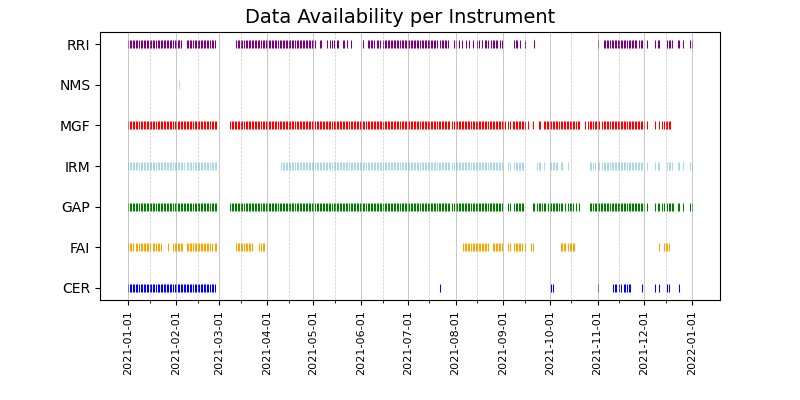

In [2]:
startDate='20210101'
endDate='20220101'
directory = 'cas_epop_data_files\\'
filelist = os.listdir(directory)

availabilityPlot(filelist,directory,startDate,endDate,search=True)

We can also check the data availability since the begining of CASSIOPE.   
***Note :*** *The most recent date we have is May 30th 2023*.

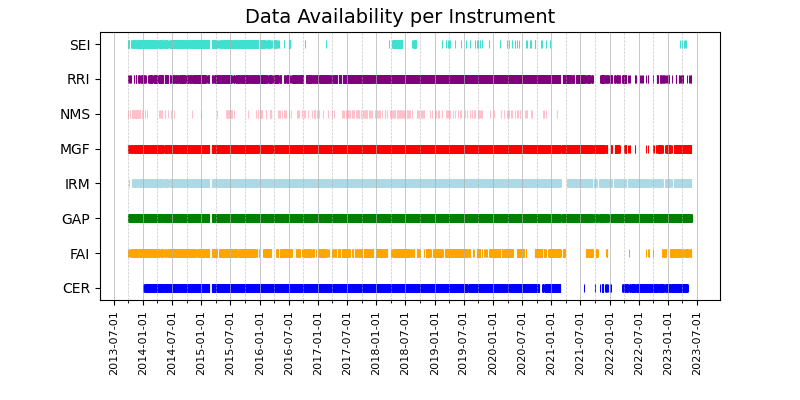

In [3]:
startDate='20130930'
endDate=dt.today().strftime('%Y%m%d')
availabilityPlot(filelist,directory,startDate,endDate)